In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(9628)

Part 1

In [20]:
def optimizer(a, eta):
    if a > eta/2:
        return a - eta/2
    if np.abs(a) <= eta/2:
        return 0
    return a + eta/2

def one_var_lasso(r, x, lam):
    b_hat = np.dot(r.T,x) / np.sum(x**2)

    n = np.shape(x)[0]
    result = optimizer(b_hat, 2*n*lam / np.sum(x**2))
    return result

def MyLasso(X, y, lam_seq, maxit = 100):
    n, p = X.shape
    nlam = len(lam_seq)
    B = np.zeros((p+1, nlam))


    newX = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    b = np.zeros(p)
    r = y

      # Triple nested loop
    for m in range(nlam):
        for step in range(maxit):
            for j in range(p):
                X_j = newX[:, j].reshape(-1,1)
                r = r + X_j * b[j]
                b[j] = one_var_lasso(r, X_j, lam_seq[m])
                r = r - X_j * b[j]
        B[1:, m] = b 
    
    ##############################
    # YOUR CODE:
    # Scale back the coefficients;
    # Update the intercepts stored in B[, 0]
    ##############################

    B[1:, :] = B[1:, :] / np.std(X, axis=0)[:, np.newaxis]
    B[0, :] = np.mean(y) - np.mean(X, axis=0) @ B[1:, :]

    
    return(B)

myData = pd.read_csv("/Users/jzeiders/Documents/Code/Learnings/GraduateML/src/Coding2/Coding2_Data0.csv")
var_names = myData.columns
y = myData[['Y']].to_numpy()
X = myData.drop(['Y'], axis = 1).to_numpy()

log_lam_seq = np.linspace(-1, -8, num = 80)
lam_seq = np.exp(log_lam_seq)
myout = MyLasso(X, y, lam_seq, maxit = 100)
    

/var/folders/fc/z903c2bn73s9_l02mz68j63h0000gn/T/ipykernel_116/3993382167.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[j] = one_var_lasso(r, X_j, lam_seq[m])


Maximum difference between estimated and true coefficients: 0.004645


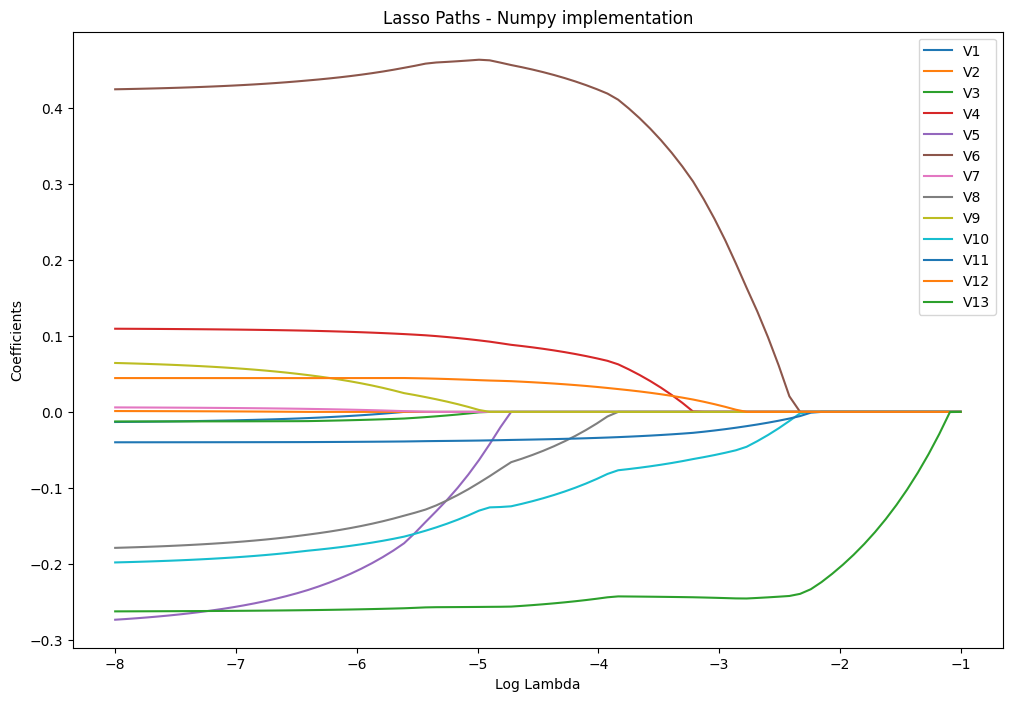

In [21]:
p, _ = myout.shape
plt.figure(figsize = (12,8))

for i in range(p-1):
    plt.plot(log_lam_seq, myout[i+1, :], label = var_names[i])

plt.xlabel('Log Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

true_coefs_df = pd.read_csv("/Users/jzeiders/Documents/Code/Learnings/GraduateML/src/Coding2/Coding2_lasso_coefs.csv")
true_B = true_coefs_df.to_numpy()

# Compute the absolute differences
differences = np.abs(myout - true_B)

# Find the maximum difference
max_diff = np.max(differences)

print(f"Maximum difference between estimated and true coefficients: {max_diff:.6f}")

